<a href="https://colab.research.google.com/github/Koush98/Sentiment_Analysis/blob/main/Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
url = "https://raw.githubusercontent.com/Koush98/Sentiment_Analysis/main/amazon.csv"

In [ ]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# loading the data set
df = pd.read_csv(url)
df.head()

,Text,label
0,This is the best apps acording to a bunch of ...,1
1,This is a pretty good version of the game for ...,1
2,this is a really . there are a bunch of levels...,1
3,"This is a silly game and can be frustrating, b...",1
4,This is a terrific game on any pad. Hrs of fun...,1


we can see the text is truncated so we need to change column width using max_colwidth parameter

In [ ]:
pd.set_option('display.max_colwidth', 800)
df.head()

,Text,label
0,This is the best apps acording to a bunch of people and I agree it has bombs eggs pigs TNT king pigs and realustic stuff,1
1,This is a pretty good version of the game for being free. There are LOTS of different levels to play. My kids enjoy it a lot too.,1
2,this is a really . there are a bunch of levels and you can find golden eggs. super fun.,1
3,"This is a silly game and can be frustrating, but lots of fun and definitely recommend just as a fun time.",1
4,This is a terrific game on any pad. Hrs of fun. My grandkids love it. Great entertainment when waiting in long lines,1


we can see the data set have the text reviews and the label is indicating its positive or negative for confirming this. lets see the values in the label column.

In [ ]:
df.label.value_counts()

label
1    15230
0     4766
Name: count, dtype: int64

we can see it has two values in label colum 0 and 1 probably 1 for positive and 0 for negative.

In [ ]:
# lets look at some negative reviews
df[df.label == 0].head()

,Text,label
78,They call it three next mario??? Are the 'professional reviewers' high??? Ask you do is fling birds at bones again and again and again. Has zero replay value.,0
79,"Angry People in my book! Any moron who would waste their time playing azimuth slingshot and call it a cultural phenomenon is ... what is the word (???) ... oh yes, a moron!!! Those 5 minutes I played this thing still scar me!",0
80,Argry Birds is for free to play a games on your kindlefireBecause it for free. and to play right.,0
81,"cant stand this game. love the concept and played many of the same type. I have to give the developer credit for creating a ton of levels, keeps you going for hours. sounds are irritating. the constant chirps are annoying as heck, play this with the soun",0
82,Don't really know the point of this game. It's almost impossible to knock the stupid birds down. Why waste your time on this one?,0


In [ ]:
# exploring the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19996 entries, 0 to 19995
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Text    19996 non-null  object
 1   label   19996 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 312.6+ KB


we can see the dataset dont have any null values

<Axes: xlabel='label', ylabel='count'>

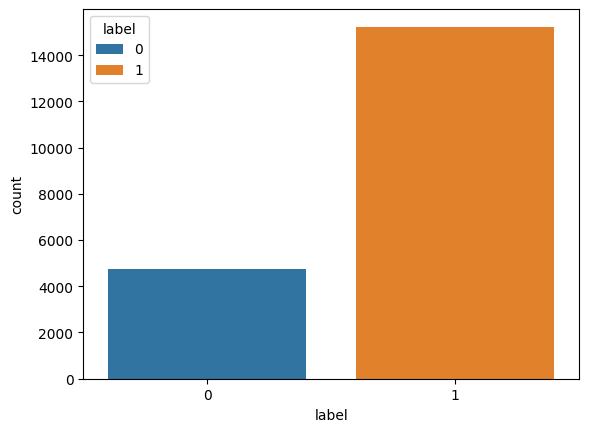

In [ ]:
# creating a count plot to compare positive and negative reviews
sns.countplot(x='label', data=df, hue = 'label')

we can see that there is more of postive reviews than negative reviews

In [ ]:
# creating count vectors
from sklearn.feature_extraction.text import CountVectorizer
# initialize count vectorizer
cv = CountVectorizer()
# creating dictionary from the corpus
fv = cv.fit(df.Text)
# get the feature names
features = fv.get_feature_names_out()
print("Total Number of features:",len(features))

Total Number of features: 18824


In [ ]:
import random as rd
rd.sample(list(features),10)

['waisting',
 'adaptable',
 'tablet',
 'cal',
 'untiil',
 'firekindle',
 'scre',
 'prevalent',
 'monster',
 'pages']

In [ ]:
# converting all the documents to count vectors using transform method
df_features = cv.transform(df.Text)
type(df_features)

scipy.sparse._csr.csr_matrix

In [ ]:
df_features.shape

(19996, 18824)

In [16]:
df_features.getnnz()

540755

In [18]:
print("Density of the matrix:",df_features.getnnz() * 100/(df_features.shape[0]*df_features.shape[1]))
#

Density of the matrix: 0.14366318865132993


In [19]:
# Displaying document vectors
# converting the matrix to a dataframe

new_df = pd.DataFrame(df_features.todense())
# setting the columns name as features
new_df.columns = features


In [20]:
df[0:1]

,Text,label
0,This is the best apps acording to a bunch of people and I agree it has bombs eggs pigs TNT king pigs and realustic stuff,1


In [29]:
new_df.iloc[0:1, 573:581]

,acknowledge,acne,acording,acquaint,acquaintance,acquiant,acquire,acquired
0,0,0,1,0,0,0,0,0


In [31]:
# selecting all the columns as per the words in thye sentence
new_df[['this', 'is','the', 'best', 'apps', 'acording', 'to', 'bunch', 'of', 'people', 'and', 'agree', 'it', 'has', 'bombs', 'eggs', 'pigs', 'tnt', 'king', 'pigs', 'and', 'realustic', 'stuff']][0:1]

,this,is,the,best,apps,acording,to,bunch,of,people,...,has,bombs,eggs,pigs,tnt,king,pigs,and,realustic,stuff
0,1,1,1,1,1,1,1,1,1,1,...,1,1,1,2,1,1,2,2,1,1


In [32]:
# removing low frequency words
features_counts = np.sum(df_features.toarray(), axis=0)
features_counts_df = pd.DataFrame(dict(features = features, counts = features_counts))

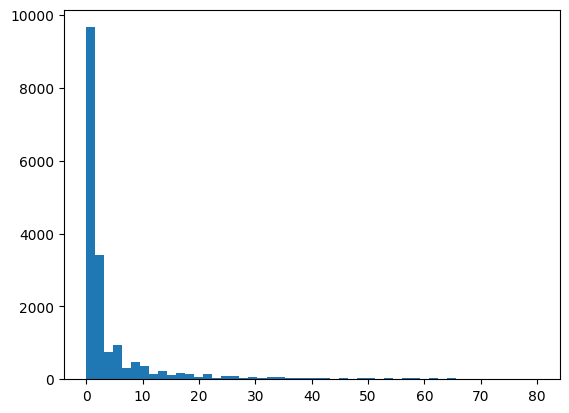

In [40]:
plt.hist(features_counts_df.counts, bins = 50, range =(0,80) )
plt.show()

In [41]:
# rare words in the dictionary
len(features_counts_df[features_counts_df.counts == 1])

9660

In [45]:
# removing stop words
from sklearn.feature_extraction import text
stop_words = text.ENGLISH_STOP_WORDS

print(list(stop_words)[:10],len(stop_words))

['already', 'last', 'never', 'about', 'move', 'very', 'formerly', 'become', 'fire', 'behind'] 318


In [81]:
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y = train_test_split(df_features, df.label, test_size = 0.3, random_state = 42)

In [82]:
# building naive bayes model
from sklearn.naive_bayes import MultinomialNB
nb_clf = MultinomialNB()
nb_clf.fit(train_x.toarray(), train_y)

MultinomialNB()

In [79]:
# making prediction on test case
df_predicted = nb_clf.predict(test_x.toarray())
pred_df=pd.DataFrame(df_predicted, test_y.values)
pred_df

,0
0,0
1,1
0,0
1,1
1,1
...,...
1,1
1,1
0,0
1,1


0.8914819136522754
              precision    recall  f1-score   support

           0       0.80      0.74      0.77      1456
           1       0.92      0.94      0.93      4543

    accuracy                           0.89      5999
   macro avg       0.86      0.84      0.85      5999
weighted avg       0.89      0.89      0.89      5999

[[1077  379]
 [ 272 4271]]


<Axes: >

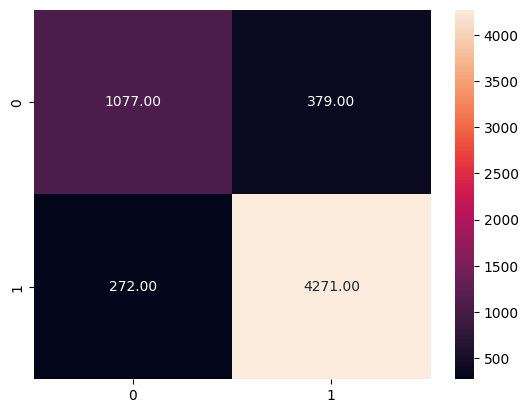

In [83]:
# Model accuracy
from sklearn import metrics
print(metrics.accuracy_score(test_y, df_predicted))
print(metrics.classification_report(test_y, df_predicted))
cm = metrics.confusion_matrix(test_y, df_predicted)
print(cm)
sns.heatmap(cm, annot=True, fmt='.2f')


In [84]:
# using TF-IDF vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
tf_idf = TfidfVectorizer(max_features = 9000)

fv1= tf_idf.fit(df.Text)
df_features1 = tf_idf.transform(df.Text)
features1 = fv1.get_feature_names_out()
print("Total Number of features:",len(features1))

Total Number of features: 9000


In [85]:
from sklearn.naive_bayes import GaussianNB
nb_clf1 = GaussianNB()
nb_clf1.fit(train_x.toarray(), train_y)

GaussianNB()

In [92]:
df_predicted1 = nb_clf1.predict(test_x.toarray())
pred_df1=pd.DataFrame(df_predicted1, test_y.values)
pred_df1

,0
0,0
1,0
0,0
1,1
1,0
...,...
1,0
1,1
0,0
1,1


In [93]:
print(metrics.accuracy_score(test_y, df_predicted1))
print(metrics.classification_report(test_y, df_predicted1))

0.584930821803634
              precision    recall  f1-score   support

           0       0.33      0.70      0.45      1456
           1       0.85      0.55      0.67      4543

    accuracy                           0.58      5999
   macro avg       0.59      0.62      0.56      5999
weighted avg       0.72      0.58      0.61      5999



In [94]:
# using n-grams
from sklearn.naive_bayes import BernoulliNB
nb_clf2 = BernoulliNB()
nb_clf2.fit(train_x.toarray(), train_y)

BernoulliNB()

In [95]:
df_predicted2 = nb_clf2.predict(test_x.toarray())
pred_df2=pd.DataFrame(df_predicted2, test_y.values)
pred_df2

,0
0,0
1,1
0,0
1,1
1,1
...,...
1,0
1,1
0,0
1,1


In [96]:
print(metrics.accuracy_score(test_y, df_predicted2))
print(metrics.classification_report(test_y, df_predicted2))

0.8854809134855809
              precision    recall  f1-score   support

           0       0.81      0.69      0.75      1456
           1       0.91      0.95      0.93      4543

    accuracy                           0.89      5999
   macro avg       0.86      0.82      0.84      5999
weighted avg       0.88      0.89      0.88      5999

